 # Libraries and functions

In [1]:
pip install pyreadr pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr

In [3]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [4]:
def outlier_values(df):
    outliers = pd.Series(dtype="float64")

    for col in df.select_dtypes(include=["number"]):  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = mask.mean() * 100  
    return outliers

In [5]:
def missing_values(df):
  return(df.isnull().sum())

In [6]:
def plot_variable_distributions(dataframe, output_dir="plots"):
#   import os

#   # Créer le répertoire si nécessaire
#   os.makedirs(output_dir, exist_ok=True)

  # Variables numériques
  for column in dataframe.select_dtypes(include='number').columns:
      plt.figure(figsize=(10, 6))
      sns.histplot(dataframe[column], kde=True, color="blue", stat = 'percent')
      plt.title(f"Distribution de {column}")
      plt.xlabel(column)
      plt.ylabel("Pourcentage")
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()

  # Variables catégoriques
  for column in dataframe.select_dtypes(include='category').columns:
      plt.figure(figsize=(10, 6))
      sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, stat='percent')
      plt.title(f"Distribution de {column}")
      plt.xlabel("Pourcentage")
      plt.ylabel(column)
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()



In [7]:
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include='number').columns
    plt.figure(figsize=(15, 10))

    # Créer un boxplot pour chaque variable numérique
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


In [8]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

 # Load freMPL files into one

In [9]:
file_paths = ['freMPL1.rda','freMPL2.rda','freMPL3.rda','freMPL4.rda','freMPL5.rda',
              'freMPL6.rda','freMPL7.rda','freMPL8.rda','freMPL9.rda','freMPL10.rda']

In [10]:
file_paths = [f'/home/onyxia/work/Federated_Learning_Milliman/raw_data/{file}' for file in file_paths]

In [11]:
df = load_rda(file_paths)
df1 = clean_data(df)

/opt/conda/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/opt/conda/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/opt/conda/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/opt/conda/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/opt/conda/lib/python3.12/site-packages/pyreadr/_pyreadr_parser.py:233: RuntimeWarning: invalid value encountered in cast
  df[colname] = df[colname].values.astype("datetime64[D]").astype(datetime)
/opt/conda

In [12]:
freMPL_final = pd.concat(df1, ignore_index=True)
freMPL_final_cleaned = freMPL_final.dropna(axis=1)#on enlève les colonnes avec des NA

In [13]:
freMPL_final_cleaned['LicAge'] = freMPL_final_cleaned['LicAge']/12

/tmp/ipykernel_72310/1192033273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freMPL_final_cleaned['LicAge'] = freMPL_final_cleaned['LicAge']/12


In [14]:
freMPL_final_cleaned.to_csv('freMPL.csv',index=False)

In [15]:
freMPL_final_cleaned

,Exposure,LicAge,RecordBeg,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,ClaimAmount,ClaimInd
0,0.583,30.500000,2004-06-01 00:00:00,Female,Other,CSP1,Professional,55,0,72,0.000000,0
1,0.200,15.583333,2004-10-19 00:00:00,Male,Alone,CSP55,Private+trip to office,34,0,80,0.000000,0
2,0.083,14.083333,2004-07-16 00:00:00,Female,Other,CSP1,Professional,33,0,63,0.000000,0
3,0.375,14.166667,2004-08-16 00:00:00,Female,Other,CSP1,Professional,34,0,63,0.000000,0
4,0.500,18.666667,2004-01-01 00:00:00,Male,Other,CSP47,Professional,53,0,72,1418.610272,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243060,0.217,22.583333,2004-10-13 00:00:00,Male,Other,CSP50,Professional,40,0,50,0.000000,0
243061,0.225,48.583333,2004-10-10 00:00:00,Male,Other,CSP60,Private,67,0,50,0.000000,0
243062,0.510,42.750000,2004-01-01 00:00:00,Male,Other,CSP60,Private,65,0,62,0.000000,0
243063,0.833,63.666667,2004-03-01 00:00:00,Male,Other,CSP60,Private,83,0,50,0.000000,0


In [16]:
freMPL_final_cleaned.dtypes

Exposure        float64
LicAge          float64
RecordBeg        object
Gender         category
MariStat       category
SocioCateg       object
VehUsage       category
DrivAge           int32
HasKmLimit        int32
BonusMalus        int32
ClaimAmount     float64
ClaimInd          int32
dtype: object

# Etude statistique de la base

In [17]:
freMPL = pd.read_csv('freMPL.csv')

In [18]:
freMPL = freMPL.astype({col: 'category' for col in freMPL.select_dtypes(include='object').columns})

In [19]:
freMPL.head()

,Exposure,LicAge,RecordBeg,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,BonusMalus,ClaimAmount,ClaimInd
0,0.583,30.500000,2004-06-01 00:00:00,Female,Other,CSP1,Professional,55,0,72,0.000000,0
1,0.200,15.583333,2004-10-19 00:00:00,Male,Alone,CSP55,Private+trip to office,34,0,80,0.000000,0
2,0.083,14.083333,2004-07-16 00:00:00,Female,Other,CSP1,Professional,33,0,63,0.000000,0
3,0.375,14.166667,2004-08-16 00:00:00,Female,Other,CSP1,Professional,34,0,63,0.000000,0
4,0.500,18.666667,2004-01-01 00:00:00,Male,Other,CSP47,Professional,53,0,72,1418.610272,1


In [29]:
outlier_values(freMPL)

Exposure        0.000000
LicAge          0.081871
DrivAge         0.042787
HasKmLimit     11.472651
BonusMalus      2.245078
ClaimAmount     7.155699
ClaimInd        6.542694
dtype: float64

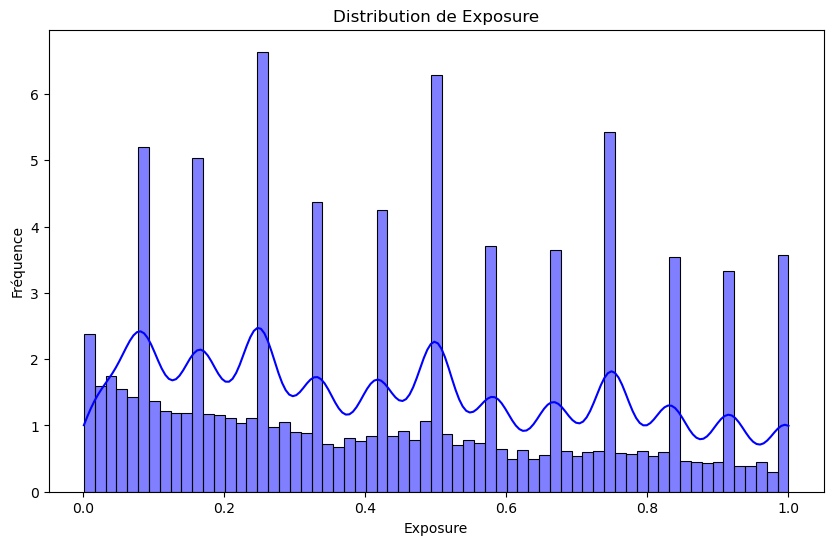

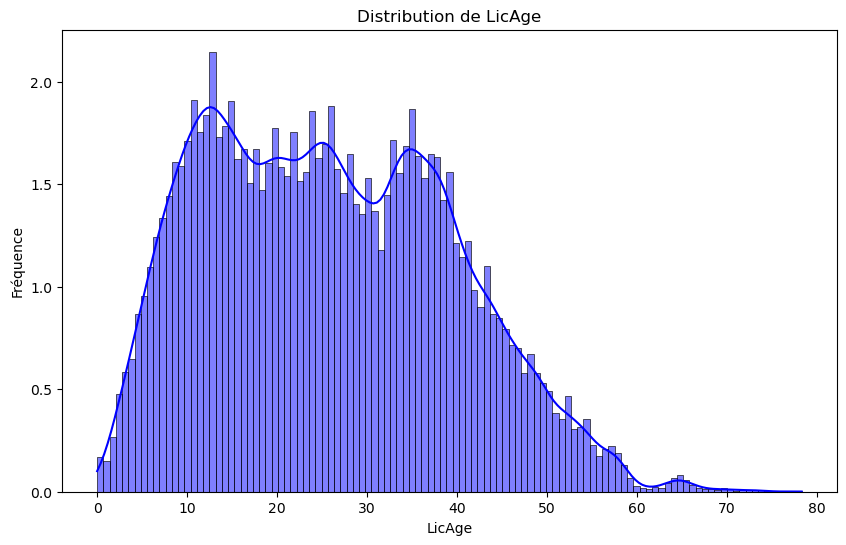

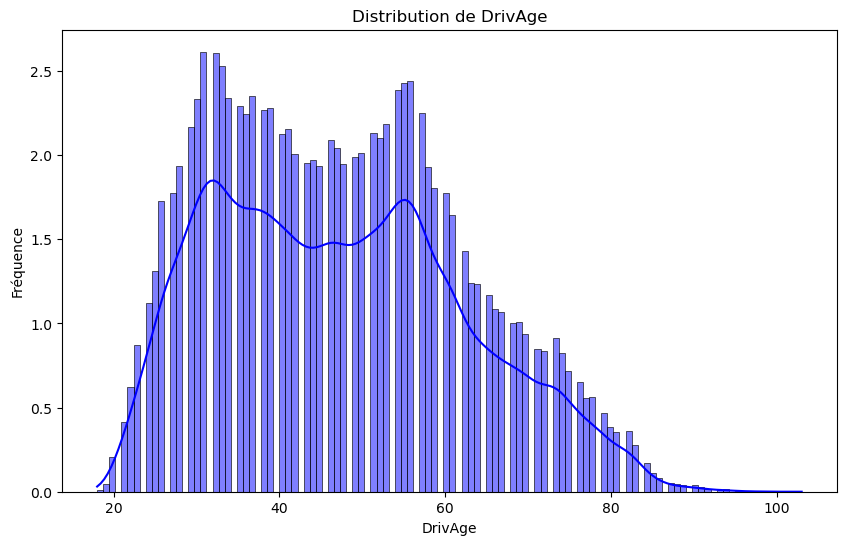

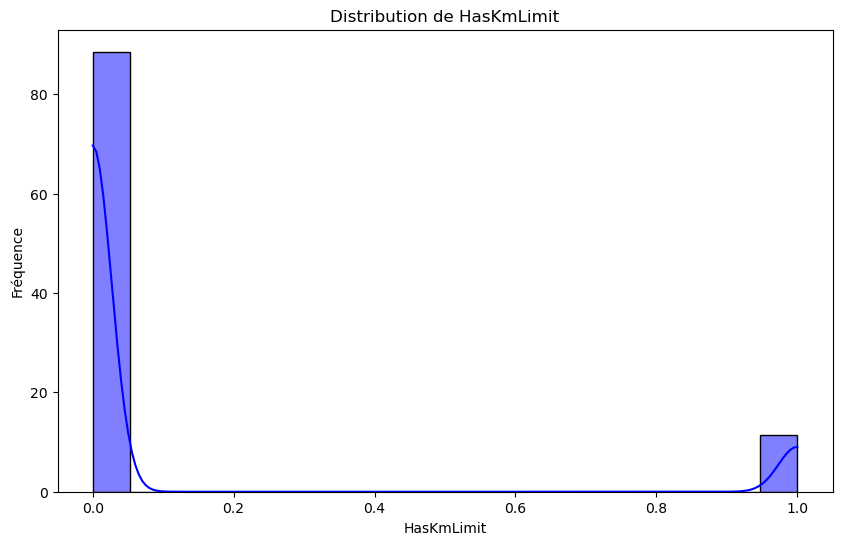

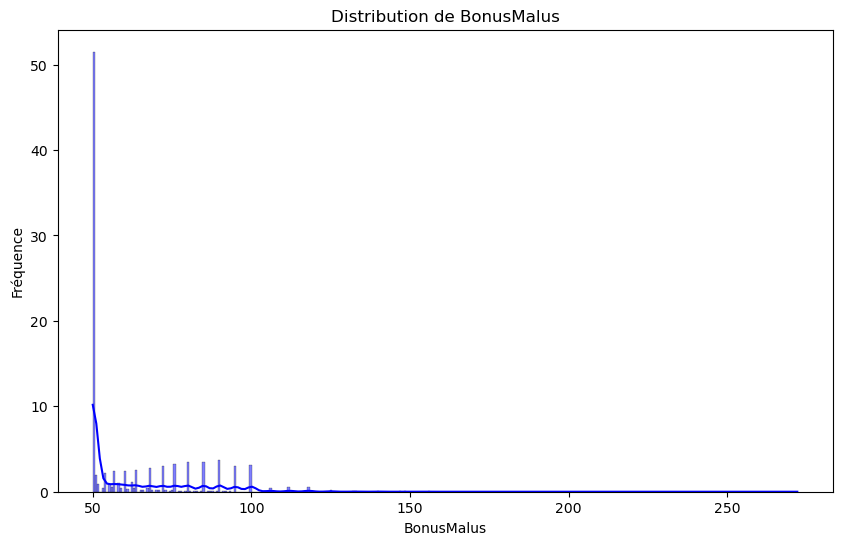

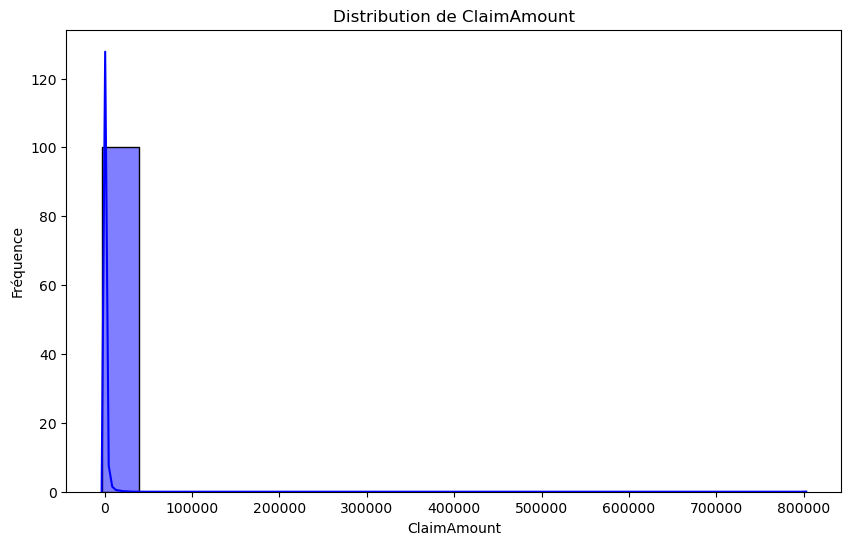

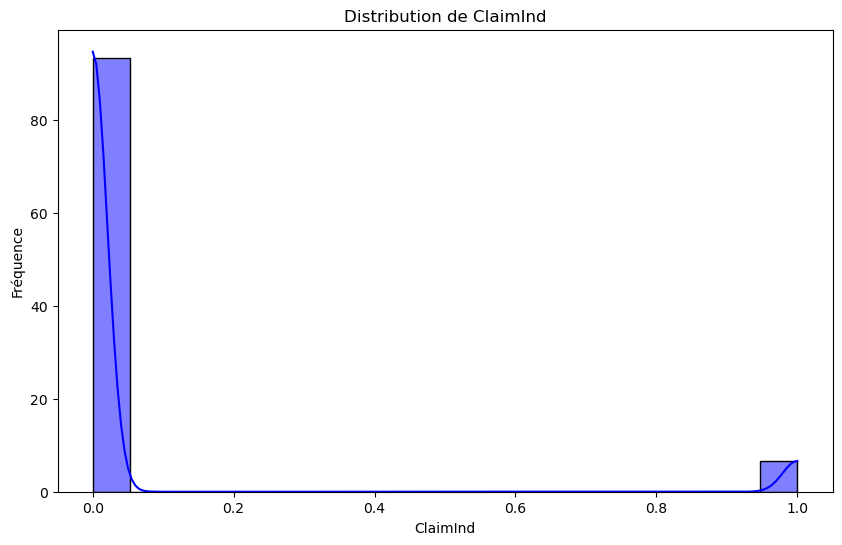

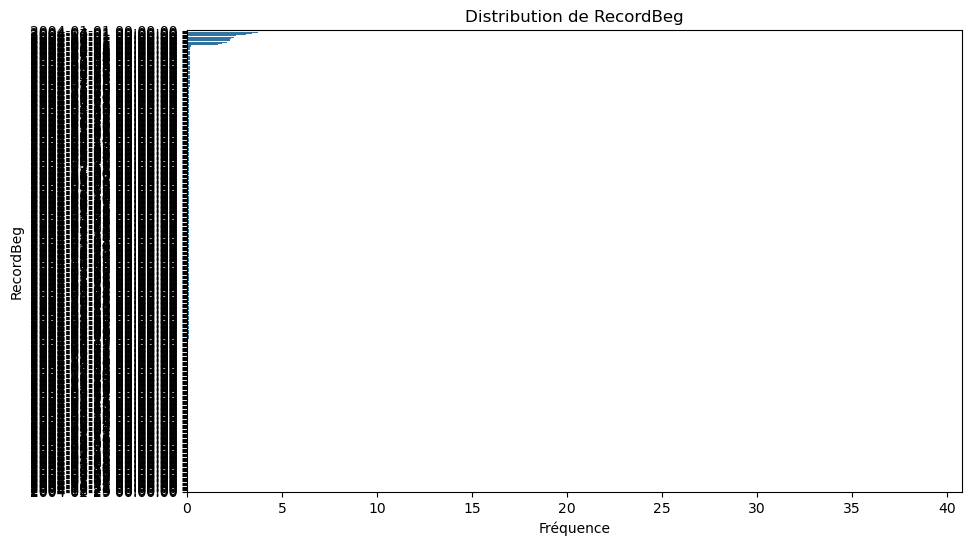

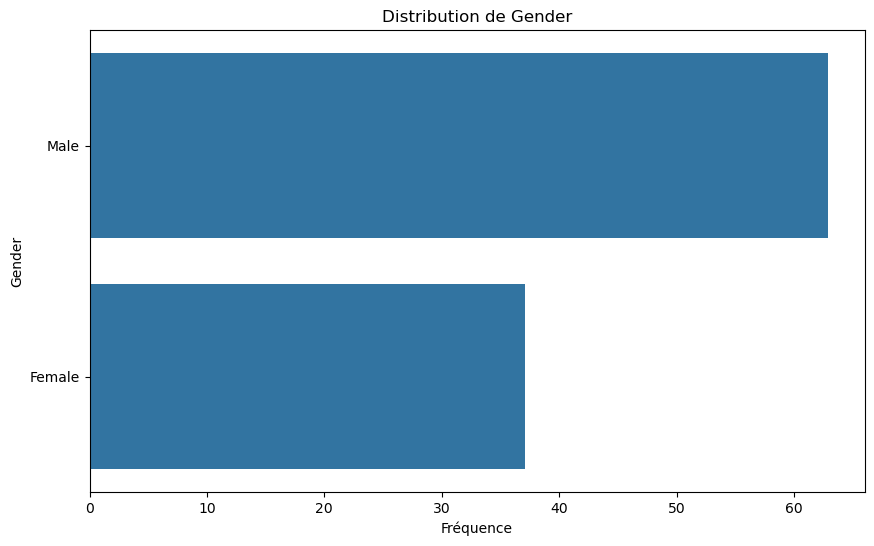

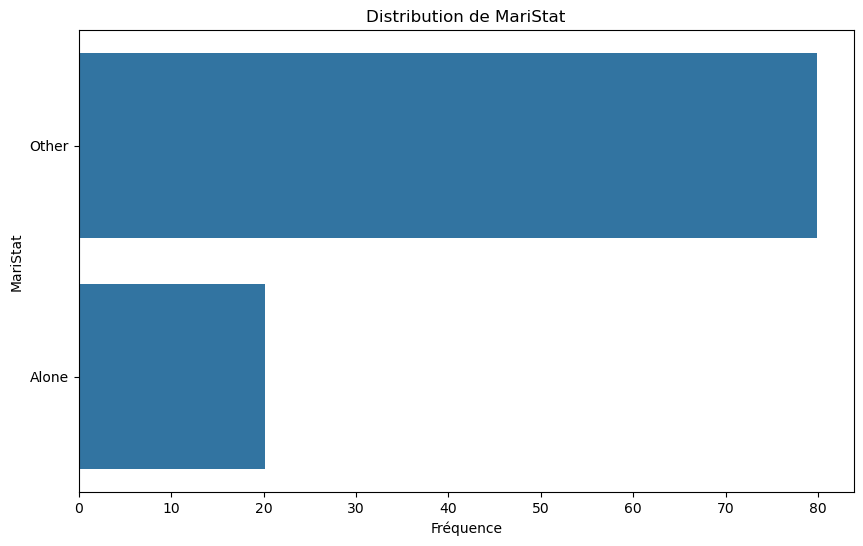

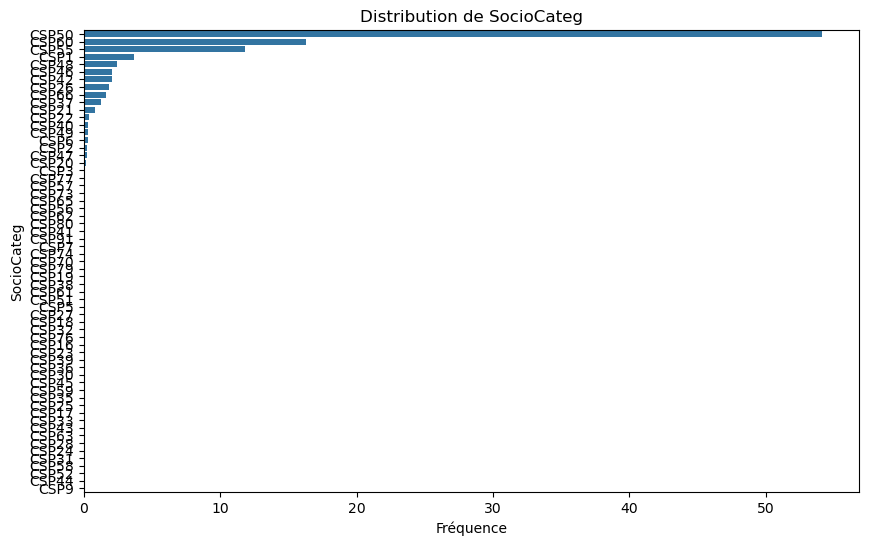

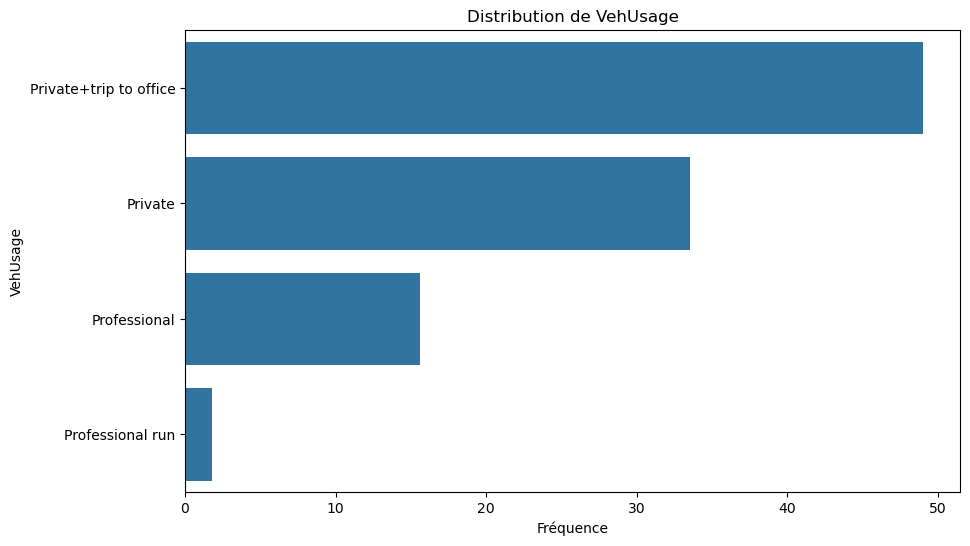

In [22]:
plot_variable_distributions(freMPL)

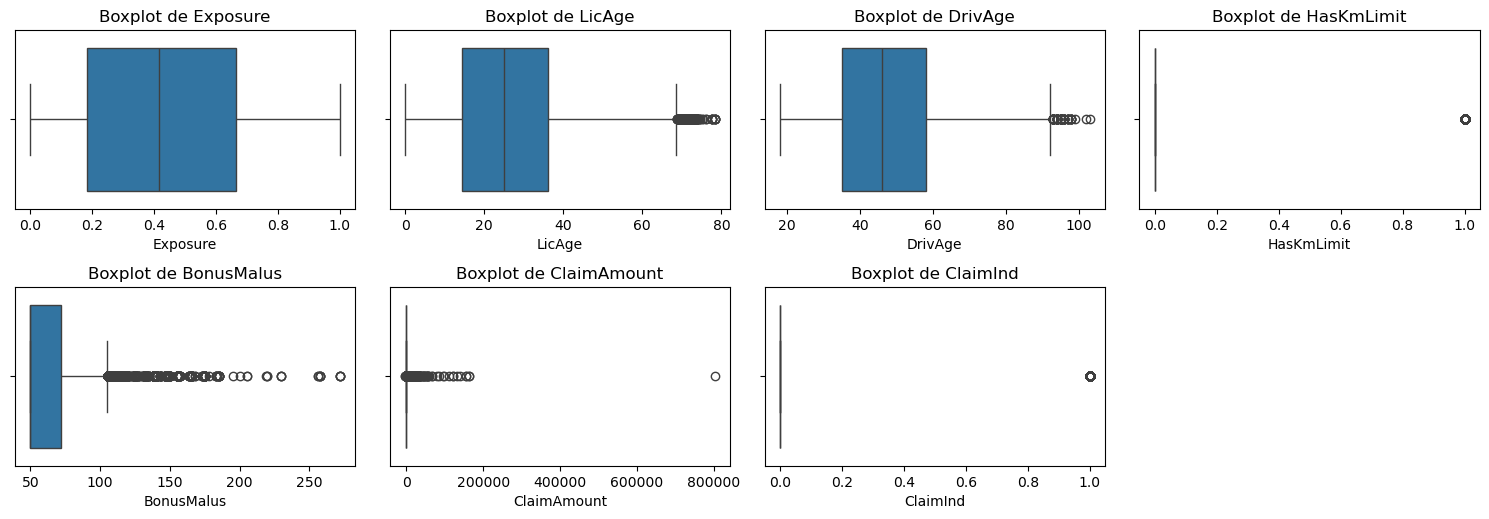

In [23]:
plot_boxplots(freMPL)

In [24]:
freMPL.dtypes

Exposure        float64
LicAge          float64
RecordBeg      category
Gender         category
MariStat       category
SocioCateg     category
VehUsage       category
DrivAge           int64
HasKmLimit        int64
BonusMalus        int64
ClaimAmount     float64
ClaimInd          int64
dtype: object

## Etude plus approndi

<Axes: xlabel='DrivAge', ylabel='Percent'>

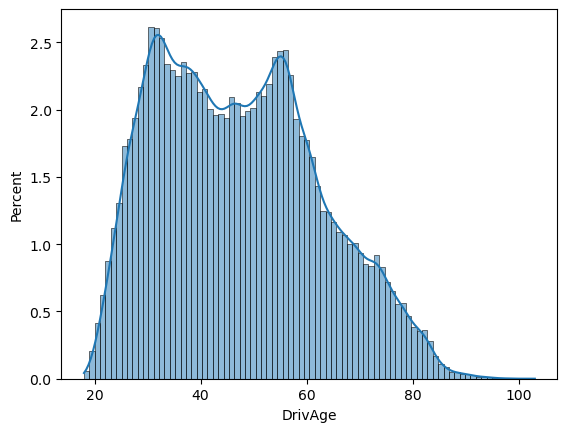

In [25]:
sns.histplot(freMPL['DrivAge'], bins=84, kde=True, stat='percent')

<Axes: xlabel='LicAge', ylabel='Count'>

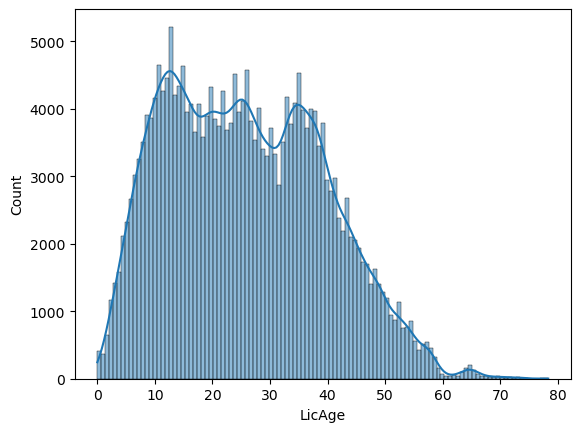

In [26]:
sns.histplot(freMPL['LicAge'], kde=True)

<Axes: xlabel='Exposure', ylabel='Count'>

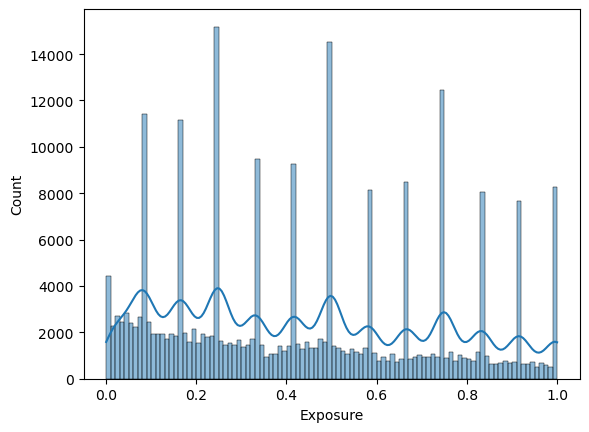

In [27]:
sns.histplot(freMPL['Exposure'], bins = 100, kde=True)

In [28]:
freMPL.describe().round(2)

,Exposure,LicAge,DrivAge,HasKmLimit,BonusMalus,ClaimAmount,ClaimInd
count,243065.00,243065.00,243065.00,243065.00,243065.00,243065.00,243065.00
mean,0.44,25.87,47.37,0.11,62.24,134.19,0.07
std,0.29,13.58,15.12,0.32,17.67,2138.34,0.25
min,0.00,0.00,18.00,0.00,50.00,-3407.70,0.00
25%,0.18,14.42,35.00,0.00,50.00,0.00,0.00
50%,0.42,25.00,46.00,0.00,50.00,0.00,0.00
75%,0.67,36.08,58.00,0.00,72.00,0.00,0.00
max,1.00,78.33,103.00,1.00,272.00,802620.27,1.00


In [30]:
freMPL.describe(include = 'category')

,RecordBeg,Gender,MariStat,SocioCateg,VehUsage
count,243065,243065,243065,243065,243065
unique,366,2,2,61,4
top,2004-01-01 00:00:00,Male,Other,CSP50,Private+trip to office
freq,94418,152820,194062,131599,119201


# Résumé

Exposure: pic tous les 0.8 exposure( correspond à 1 mois)

LicAge(age du permis): sensiblement même allure que DrivAge mais avec un pic supplémentaire

RecordBeg : début du contrat, inutile

Gender: environ 60% homme 40% femme

MariStat: Majorité autre

SocioCateg: majorité d'employé(CSP50)

VehUsage: majorité de véhicule pour usage privé et aller au travail

DrivAge : pic d'age pour la trentaine et 55 ans, baisse drastique ensuite pour les personnes plus agées

HasKmLimit: 10% ont une limite

BonusMalus: très grande majorité <100 c'est_à dire en bonus

ClaimAmount: moyenne de 134

ClaimInd: environ 10% de claim de sinistre 

In [ ]:
claim_stats = freMPL.groupby('ClaimInd').agg(
    average_LicAge=('LicAge', 'mean'),
    count=('LicAge', 'size')
).sort_values(by='average_LicAge', ascending=False)

In [36]:
print(claim_stats)

          average_LicAge   count  gender_count
ClaimInd                                      
0              25.923345  227162        227162
1              25.055566   15903         15903


In [40]:
L = freMPL.groupby('ClaimInd')['Gender'].value_counts().unstack(fill_value=0)

In [41]:
L.div(L.sum(axis=1),axis=0)

Gender,Female,Male
ClaimInd,,
0,0.371149,0.628851
1,0.373137,0.626863
